In [2]:
#Loading in libraries
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Section 1)**
In players dataset, there are 197 observations, and 7 variables. The mean for played_hours is 5.846, and the mean value for Age is 21.14. 

- experience: Character datatype, describes the level of skill in Minecraft each player has with 5 categories: amateur/beginner/regular/veteran/pro

- subscribe: Logical datatype, states if the individual player is subscribed to the gaming newsletter: True/False

- hashedEmail: Character datatype, states the player's hashed email address to make information secure and private

- played_hours: Double datatype, amount of hours each player has played in Minecraft

- name: Character datatype, states the player's first name 

- gender: Character datatype, states the player's gender: Male/Female/Non-binary/Two-Spirited/Other/Prefer not to say

- Age: Integer datatype, the player's age as a whole number

Some issues visable in the dataset are missing age and gender entries marked by 'NA' and 'prefer not to say'. Also, the played_hours data is very wide spread and has many '0' values. There could also be unseen issues with the scaling for this varible, or a bias in the sampling of players to gather this data. The data was collected through playing the PLAICraft game, where the player's gameplay, speech, and key presses are recorded (PLAICraft.ai website).

**Section 2)**
- Broad question: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
- Specific question: Can age predict the number of hours played from the players dataset?

The data will help me address my question because it is likely that a player's age could impact how many hours they play, and both of these variables are present in the dataset. I will visualize the possible correlation between these two variables in order to answer my question. 

The data from players is already tidy as each variable has its own column, each row is its own set of measurements, and each cell contains a single value. To wrangle this data for visualizing, I will select the relevant columns: Age and played_hours. For the 2 NA values in Age, I will remove these rows as it will not significantly impact the visualization. 

**Section 3)**
Loading in both datasets:

In [3]:
#Initial loading in players and sessisons datasets
players <- read.csv("data/players.csv")
players

sessions <- read.csv("data/sessions.csv")
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


Computing summary statistics, mean values reported in section 1: 

In [4]:
#Summary statistics for players dataset
psummary <- summary(players)
psummary

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Wrangling the data for the graph visualization:

In [5]:
#Selecting specific relevant variables in the dataset: hours and age
selectedPlayer <- select(players, played_hours, Age)
selectedPlayer

#Removing the rows with 'NA' values in Age in order to tidy the data
wrangled_player <- selectedPlayer |> drop_na()
wrangled_player

played_hours,Age
<dbl>,<int>
30.3,9
3.8,17
0.0,17
0.7,21
0.1,21
0.0,17
0.0,19
0.0,21
0.1,47


played_hours,Age
<dbl>,<int>
30.3,9
3.8,17
0.0,17
0.7,21
0.1,21
0.0,17
0.0,19
0.0,21
0.1,47


**First visualization:**

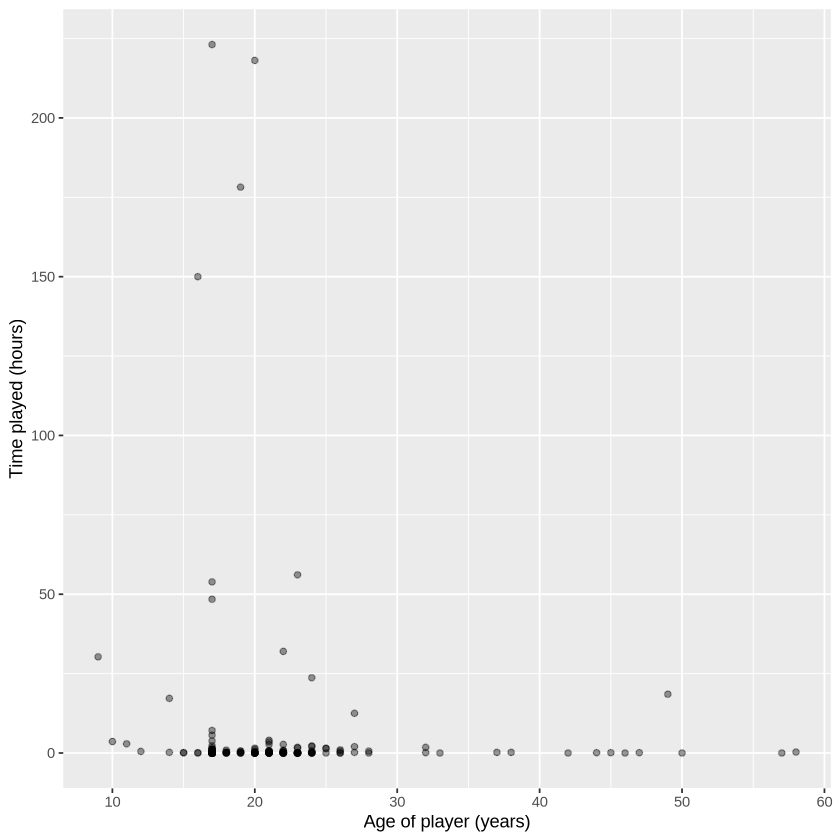

In [45]:
#Creating a scatterplot to present spread of values
plot1_players <- wrangled_player |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.4) + 
    xlab("Age of player (years)") +
    ylab("Time played (hours)") 

plot1_players

This scatterplot does not demonstrate a positive/negative trend or relationship between the variables. 

**Second visualization:**

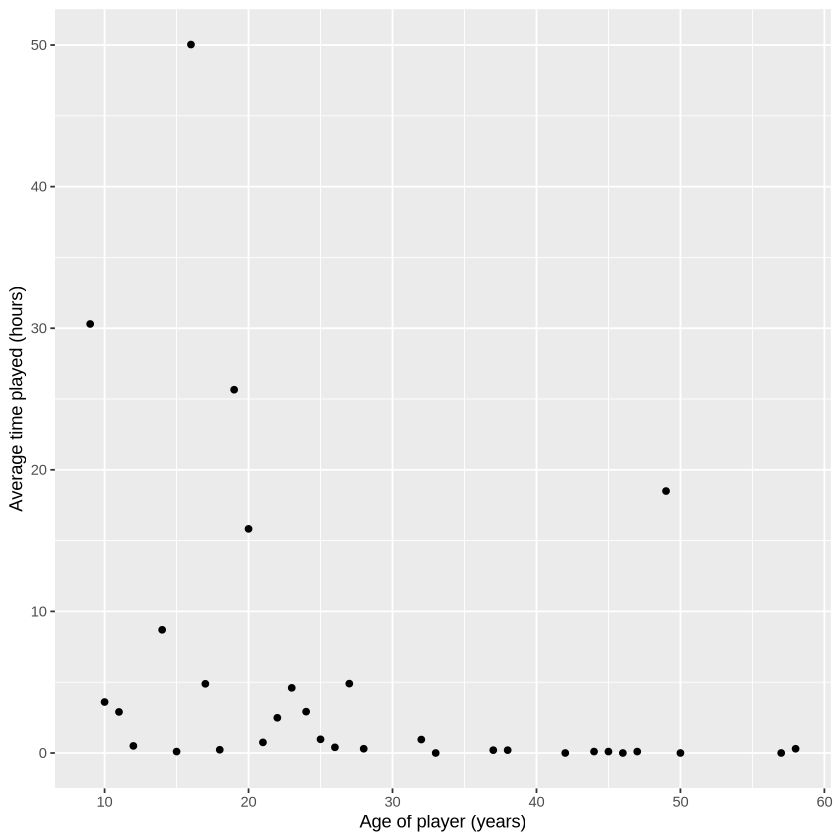

In [42]:
#Mutating the dataset to calculate mean hours
mutated_player <- wrangled_player |>
    group_by(Age) |>
    summarize(mean_hours = mean(played_hours))

#Second scatterplot with new variable
plot2_players <- mutated_player |>
    ggplot(aes(x = Age, y = mean_hours)) +
    geom_point() + 
    xlab("Age of player (years)") +
    ylab("Average time played (hours)") 

plot2_players

This graph demonstrates the highest average playtime of ~50 hours was for 16-year-olds, however, there is still no linear trend between age and hours played. 

**Third visualization:**

age_grouped,added_hours
<fct>,<dbl>
5-10,30.3
10-15,24.4
15-20,688.2
20-25,361.4
25-30,19.8
30-35,1.9
35-40,0.4
40-45,0.1
45-50,18.7


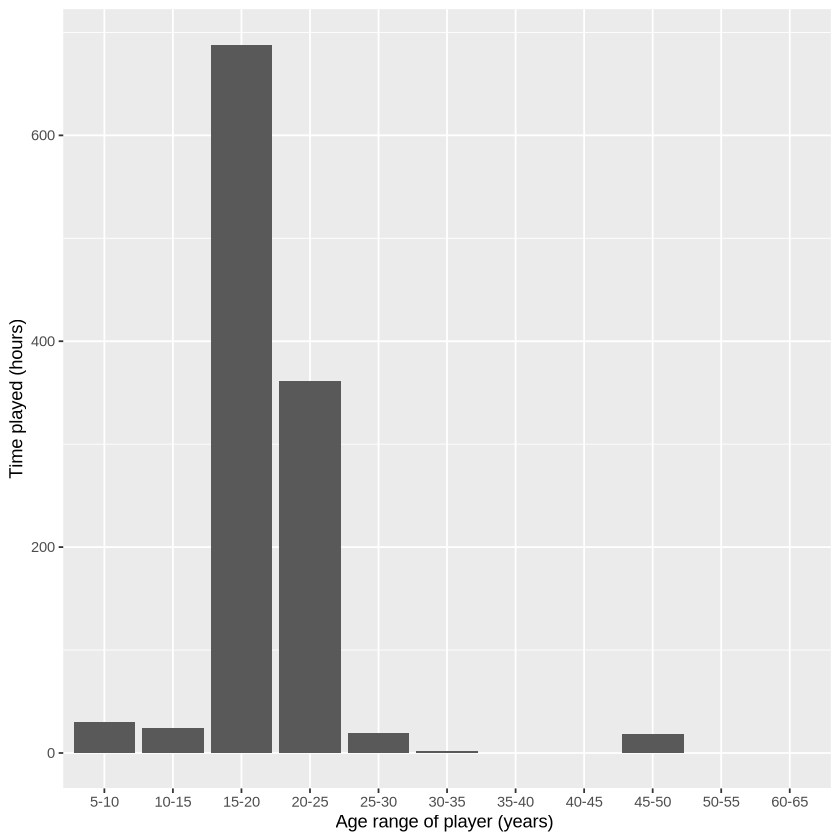

In [43]:
#Mutating dataset to split ages into small groups
mutated1_player <- wrangled_player |>
    mutate(age_grouped = cut(Age, breaks = seq(5, 60, by = 5),
    labels = c("5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "60-65"),
    right = FALSE))

#Mutating dataset to calculate summed hours
mutated2_player <- mutated1_player |>
    group_by(age_grouped) |>
    summarize(added_hours = sum(played_hours))

mutated2_player

plot3_players <- mutated2_player |>
    ggplot(aes(x = age_grouped, y = added_hours)) +
    geom_bar(stat = "identity") + 
    xlab("Age range of player (years) ") +
    ylab("Time played (hours)")

plot3_players

This visualization helps answer my question, proving insight that a player between age 15-25 is more likely to have a higher amount of hours played than any other, suggesting that age can be used as a predictor for time played. 

**Section 4)**
I believe that linear regression is the most appropriate method for my question because the dataset is large and this method can help define a relationship between the variables age and hours played. This method assumes the relationship in the data will be linear and that this relationship will exist. However, a weakness is that this method assumes the relationship can be represented by a straight line and not a curve. Additionally, linear regression can be easily affected by outliers, which can decrease the accuracy of the model.

I will compare linear regression and K-NN, using a confusion matrix to find accuracy, as well as calculating RMSE for both models to find the margin of error. I will use several test datapoints and  evaluate which has the lowest RMSE, and will take accuracy into my consideration for the best model. To process the data for linear regression, I will split the data using a 75 training-25 testing split because the dataset's size and will conduct this before I proceeed with making the model. I will not use a validation set or cross-validate because the model is very simple and won't require this extra processing. 